# Functions

In [1]:
# prevents warnings from being printed only in this cell
import warnings
warnings.filterwarnings("ignore")
import pickle

from matplotlib.pyplot import *
from scipy import interpolate

%pylab inline
warnings.filterwarnings("default")

from isomerization_lib import *

%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Load Opsin data

In [2]:
fsave = './PhotoReceptorData'
PhData = load_obj(fsave)                        # Photo Receptors Data

Opsins=[]                                       # Opsins matrix initialization

Opsins.append(PhData['Scones'])                 # S cones
Opsins.append(PhData['Mela'])                   # Melanopsin
Opsins.append(PhData['Rods'])                   # Rods
Opsins.append(PhData['Mcones'])                 # M cones
Opsins.append(PhData['RedOpsin'])               # Red Opsin

x = PhData['x_axis']                            # Wavelength axis

# Creating a dictionary with indexes for each opsin
OpsinIndex = {'S-cone':0,'Melano':1,'Rhodo':2,'M-cone':3,'Redo':4}


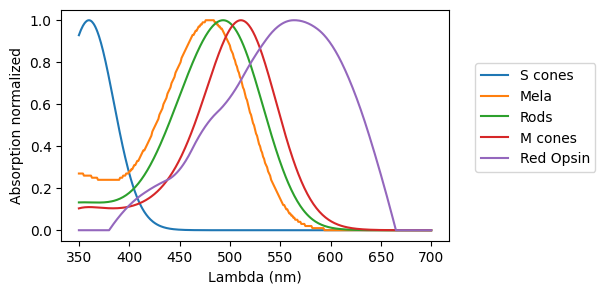

In [3]:
fig, ax = plt.subplots(figsize=(5, 3))

for o in Opsins:
    ax.plot(x,o)

ax.set_xlabel('Lambda (nm)')    
ax.set_ylabel('Absorption normalized')

# move legend out of the plot
ax.legend(['S cones','Mela','Rods','M cones','Red Opsin'], bbox_to_anchor=(1.05, 0.8))


# Load LEDs illumination Data

In [4]:
fsave = './IlluminationDataMEA2'
IData = load_obj(fsave)                                     # Illumination Data Load

LEDs =[]                                                    # LEDs matrix initialization                                
LEDs.append(IData['Violet'])                                # Violet        
LEDs.append(IData['Blue'])                                  # Blue
LEDs.append(IData['Green'])                                 # Green
LEDs.append(IData['Yellow'])                                # Yellow
LEDs.append(IData['Red'])                                   # Red

x = IData['x_axis']                                         # Wavelength axis

# Power meter correction factor from 09/09/22
correction_f = 1                                        

LEDs=np.array(LEDs)/correction_f                            # Correction

In [5]:

# To fix the value of power for the red LED
# You take the value measured and multiply it like below (before you divide by the area under the curve)

USE_CUSTOM_MEASURED_POWER = True

if USE_CUSTOM_MEASURED_POWER:
    newred = 4230
    LEDs[4]  = LEDs[4]/(np.sum(LEDs[4]/2))*newred

    newyellow = 505
    LEDs[3]  = LEDs[3]/(np.sum(LEDs[3]/2))*newyellow

    newgreen = 368
    LEDs[2]  = LEDs[2]/(np.sum(LEDs[2]/2))*newgreen

    newblue = 540
    LEDs[1]  = LEDs[1]/(np.sum(LEDs[1]/2))*newblue

    newviolet = 623
    LEDs[0]  = LEDs[0]/(np.sum(LEDs[0]/2))*newviolet


0 623.0
1 539.9999999999999
2 367.99999999999994
3 504.99999999999994
4 4230.0


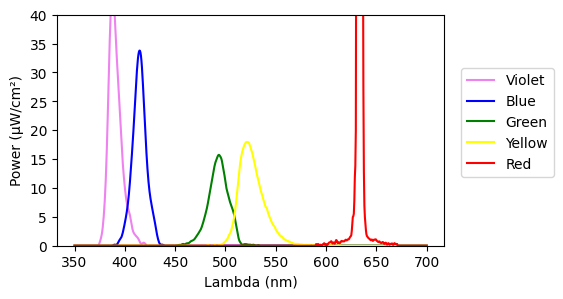

In [6]:
fig , ax = plt.subplots(figsize=(5, 3))

ax.plot(x,LEDs[0], 'violet')
ax.plot(x,LEDs[1], 'blue')
ax.plot(x,LEDs[2], 'green')
ax.plot(x,LEDs[3], 'yellow')
ax.plot(x,LEDs[4], 'red')

ax.legend(['Violet','Blue','Green','Yellow','Red'], bbox_to_anchor=(1.3, 0.8))

ax.set_ylim([0,40])
ax.set_xlabel('Lambda (nm)')
ax.set_ylabel('Power (µW/cm²)')

for i in np.arange(5):
    print(i,np.sum(LEDs[i])/2)

# Calculate Isomerizations

## Compute Isomerization for all opsins for all LEDs sources

In [7]:
print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM VIOLET LED')

# Get effect from Violet
VIOLET_ISO_result = IlluminanceFactor(LEDs[0],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(VIOLET_ISO_result,F=0)

# -----------------------------------------------------------------------------------------------

print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM BLUE LED')

# Get effect from Blue
BLUE_ISO_result = IlluminanceFactor(LEDs[1],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(BLUE_ISO_result,F=0)

# -----------------------------------------------------------------------------------------------

print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM GREEN LED')

# Get effect from Green
GREEN_ISO_result = IlluminanceFactor(LEDs[2],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(GREEN_ISO_result,F=0)

# -----------------------------------------------------------------------------------------------

print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM YELLOW LED')

# Get effect from Yellow
YELLOW_ISO_result = IlluminanceFactor(LEDs[3],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(YELLOW_ISO_result,F=0)

# -----------------------------------------------------------------------------------------------

print ('\n')
print ('-----------------------------')
print ('EFFECTS FROM RED LED')

# Get effect from RED
RED_ISO_result = IlluminanceFactor(LEDs[4],Opsins,x)
print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(RED_ISO_result,F=0)

print ('\n')




-----------------------------
EFFECTS FROM VIOLET LED
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :    1152076
Melanopsin  :     621078
Rhodopsin   :     947369
Mcones      :     263049
Red_opsin   :     165500


-----------------------------
EFFECTS FROM BLUE LED
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :     234260
Melanopsin  :     870413
Rhodopsin   :    1493781
Mcones      :     318181
Red_opsin   :     392915


-----------------------------
EFFECTS FROM GREEN LED
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :         75
Melanopsin  :    1672912
Rhodopsin   :    4433008
Mcones      :    1584489
Red_opsin   :    1083206


-----------------------------
EFFECTS FROM YELLOW LED
Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :          3
Melanopsin  :    1241788
Rhodopsin   :    4548956
Mcones      :    2308388
Red_

In [8]:
# Get effect from All together

ISO_result = IlluminanceFactor(np.sum(LEDs[0:4],axis=0),Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')


Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :    1386414
Melanopsin  :    4406191
Rhodopsin   :   11423113
Mcones      :    4474107
Red_opsin   :    3874248

Scones      : 1.39e+06
Melanopsin  : 4.41e+06
Rhodopsin   : 1.14e+07
Mcones      : 4.47e+06
Red_opsin   : 3.87e+06


### Compute rhodopsin / M-opsin ratio for each source

In [9]:
OpsinIndex

{'S-cone': 0, 'Melano': 1, 'Rhodo': 2, 'M-cone': 3, 'Redo': 4}

### Compute ratios among different opsins for the same LED source

This operation is usefull in order to quantify how much a single led influences three main opsins which are:
 - M opsin
 - Rhodopsin
 - S opsin


## Yellow 🟡 and Green 🟢 LED sources **(LOW Energy Source)**

Will indicate with $I^M_Y$ the isomerization of M-Opsin due to Yellow LED source

Will indicate with $I^M_G$ the isomerization of M-Opsin due to Green LED source

### What is the effect of Yellow and Green LED sources on Rhodopsin?

Will indicate with $I^{Rho}_Y$ the isomerization of Rhodopsin due to Yellow LED source

Will indicate with $I^{Rho}_G$ the isomerization of Rhodopsin due to Green LED source

Proportionality coefficents are defined as:

$r_{MY} = \frac{I^{Rho}_Y}{I^M_Y}$

$r_{MG} = \frac{I^{Rho}_G}{I^M_G}$

### What is the effect of Yellow and Green LED sources on S-Opsin?

No effect



## Violet 🟣 LED source **(HIGH Energy Source)**

Will indicate with $I^M_V$ the isomerization of M-Opsin due to Violet LED source

### What is the effect of Violet LED source on Rhodopsin ?

Will indicate with $I^{Rho}_V$ the isomerization of Rhodopsin due to Violet LED source

Proportionality coefficent defined as:

$r_{MV} = \frac{I^{Rho}_V}{I^M_V}$

### What is the effect of Violet LED source on S-Opsin?

Will indicate with $I^{S}_V$ the isomerization of S-Opsin due to Violet LED source

Proportionality coefficent defined as:

$s_{MV} = \frac{I^{S}_V}{I^M_V}$



Summarizing table:

| LED source | M-Opsin | Rhodopsin | S-Opsin |
| --- | --- | --- | --- |
| 🟡 | $I^M_Y$ | $r_{MY} I^M_Y$ | 0 |
| 🟢 | $I^M_G$ | $r_{MG} I^M_G$ | 0 |
| 🔴 | $I^M_R$ | $r_{MR} I^M_R$ | 0 |
| 🟣 | $I^M_V$ | $r_{MV} I^M_V$ | $s_{MV} I^M_V$ |
| 🔵 | $I^M_B$ | $r_{MB} I^M_B$ | $s_{MB} I^M_B$ |


## Re-referencing to Yellow LED source

In order to have an independent representation of the effect of each LED from the exact number of isomerizations, we can re-reference the isomerizations to the Yellow LED source on the M-Opsin.

This means that we will divide each isomerization by the isomerization of the M-Opsin due to the Yellow LED source.

#### $\alpha = \frac{I^M_V}{I^M_Y}$          

###### -> intuitively 🟣 / 🟡

#### $\beta = \frac{I^M_G}{I^M_Y}$           

###### -> intuitively 🟢 / 🟡

#### $\gamma = \frac{I^M_B}{I^M_Y}$

###### -> intuitively 🔵 / 🟡

In [10]:
r_MV = VIOLET_ISO_result[OpsinIndex['Rhodo']] / VIOLET_ISO_result[OpsinIndex['M-cone']]
r_MB = BLUE_ISO_result[OpsinIndex['Rhodo']] / BLUE_ISO_result[OpsinIndex['M-cone']]
r_MG = GREEN_ISO_result[OpsinIndex['Rhodo']] / GREEN_ISO_result[OpsinIndex['M-cone']]
r_MY = YELLOW_ISO_result[OpsinIndex['Rhodo']] / YELLOW_ISO_result[OpsinIndex['M-cone']]
r_MR = RED_ISO_result[OpsinIndex['Rhodo']] / RED_ISO_result[OpsinIndex['M-cone']]

print ('\n')
print ('---------------------------------------')
print ('ratio Rhodo/Mcone for each LED')
print ('---------------------------------------')
print ('VIOLET  ',r_MV)
print ('BLUE    ',r_MB)
print ('GREEN   ',r_MG)
print ('YELLOW  ',r_MY)
print ('RED     ',r_MR)
print ('---------------------------------------')

s_MV = VIOLET_ISO_result[OpsinIndex['S-cone']] / VIOLET_ISO_result[OpsinIndex['M-cone']]
s_MB = BLUE_ISO_result[OpsinIndex['S-cone']] / BLUE_ISO_result[OpsinIndex['M-cone']]

print ('\n')
print ('---------------------------------------')
print ('ratio Scone/Mcone for high energy LEDs')
print ('---------------------------------------')
print ('VIOLET  ',s_MV)
print ('BLUE    ',s_MB)
print ('---------------------------------------')




---------------------------------------
ratio Rhodo/Mcone for each LED
---------------------------------------
VIOLET   3.601496127747578
BLUE     4.694752856058443
GREEN    2.797751888327731
YELLOW   1.9706201484006272
RED      0.49288204674586505
---------------------------------------


---------------------------------------
ratio Scone/Mcone for high energy LEDs
---------------------------------------
VIOLET   4.379708210145934
BLUE     0.7362474727586774
---------------------------------------


## Repeat for (Human) White Light Illumination


25.000000000000007

<Figure size 640x480 with 0 Axes>

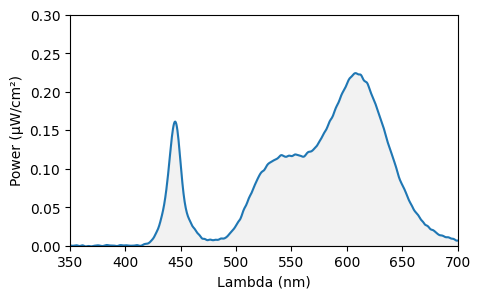

In [11]:
# Load LED data (for white in this case)
file_cal = 'cal_with_MEA2_matias.pkl'
caldata =load_obj(file_cal)

lx = caldata['xnew']
lx[0] = 300

color_order = caldata['orderS']
spec_curves = np.array(caldata['LedSpectra'])
spec_curves[:,0]=0


#--------------------------------------------------------------------------------
# White Spec for Vis Stim
figure()
WhiteVisPower = 25

WhiteVS = spec_curves[5]/np.sum(spec_curves[5])/diff(lx)[10]  * WhiteVisPower

f = interpolate.interp1d(lx,WhiteVS)
newWvis = f(x)/np.sum(f(x))*np.sum(WhiteVS)*diff(lx)[10]/diff(x)[0]

fig , ax = plt.subplots(figsize=(5, 3))

ax.plot(x,newWvis)
ax.fill_between(x,0,newWvis,alpha=0.1, color='grey')

ax.set_xlim([350,700])
ax.set_ylim([0,0.3])
ax.set_xlabel('Lambda (nm)')
ax.set_ylabel('Power (µW/cm²)')

np.sum(newWvis)*diff(x)[10]

In [12]:
# Get effect from White at Vis stim in 2p Setup

ISO_result = IlluminanceFactor(newWvis,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')


Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :         89
Melanopsin  :      22069
Rhodopsin   :      69974
Mcones      :      33646
Red_opsin   :     102293

Scones      : 8.85e+01
Melanopsin  : 2.21e+04
Rhodopsin   : 7.00e+04
Mcones      : 3.36e+04
Red_opsin   : 1.02e+05


In [13]:
# Get effect from White at OPTO full field

WhiteOptoPower = 71900/correction_f
ISO_result = IlluminanceFactor(newWvis/np.sum(newWvis)*WhiteOptoPower/diff(x)[10],Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')

print('')
# For Chrimson activation -> photons / cm2 / s -> *10^8 /ac  (=*5)
print('For photons / cm / s')
Write_fancy(ISO_result*10**8*5,F='scientific')

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :     254557
Melanopsin  :   63471241
Rhodopsin   :  201245534
Mcones      :   96767139
Red_opsin   :  294194753

Scones      : 2.55e+05
Melanopsin  : 6.35e+07
Rhodopsin   : 2.01e+08
Mcones      : 9.68e+07
Red_opsin   : 2.94e+08

For photons / cm / s
Scones      : 1.27e+14
Melanopsin  : 3.17e+16
Rhodopsin   : 1.01e+17
Mcones      : 4.84e+16
Red_opsin   : 1.47e+17


# Building (Mouse) White light illumination

## Computations

In [14]:
# Filippo
#----------------------------------------
violet = 1 * 0.5
blue   = 0 
green = 0
yellow = 0.316* 0.5
red    = 0


my_light = LEDs[0]*violet + LEDs[1]*blue + LEDs[2]*green + LEDs[3]*yellow + LEDs[4]*red


In [15]:
NDfilter = 0
Transmission =  10**(-NDfilter/10)

LIGHT = (violet*LEDs[0]+blue*LEDs[1]+green*LEDs[2]+yellow*LEDs[3]+red*LEDs[4])*Transmission

ISO_result = IlluminanceFactor(LIGHT,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :     576039
Melanopsin  :     506741
Rhodopsin   :    1192419
Mcones      :     496250
Red_opsin   :     435505


In [16]:
# Load LED data
file_cal = "cal_with_MEA2_matias.pkl"
caldata =load_obj(file_cal)
print(caldata.keys())

dict_keys(['V', 'Vcurves', 'xnew', 'LedSpectra', 'orderV', 'orderS', 'whiteP'])


In [17]:
lx = caldata['xnew']
lx[0] = 300

color_order = caldata['orderS']
spec_curves = np.array(caldata['LedSpectra'])
spec_curves[:,0]=0

reorder = [1,2,3,4,5]
Vcurves = np.array(caldata['Vcurves'])[:,reorder]

In [18]:
# New interpolated V calibration curves
#---------------------------------------------

Vnew = np.linspace(0,5,5001)
newVcurves = np.zeros([5,5001])
for i in np.arange(5):
    vals = (np. isnan(Vcurves[:,i]))==False
    f = interpolate.interp1d(caldata['V'][vals],Vcurves[:,i][vals],fill_value="extrapolate")
    newVcurves[i] = f(Vnew) / correction_f  # use interpolation function returned by `interp1d`
    newVcurves[i] = np.where(newVcurves[i]<0,0,newVcurves[i]) # take negative extrapolations out


In [19]:

# 1/violet,1/green,Transmission
#Print voltages
print('\nVoltages')
print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
print('yellowV',find_V(yellow,'r', newVcurves, Vnew),' V')
print('greenV ',find_V(green,'r', newVcurves, Vnew),' V')
print('blueV  ',find_V(blue,'r', newVcurves, Vnew),' V')
print('violetV',find_V(violet,'r', newVcurves, Vnew),' V')



Voltages
The index is: 0
redV    0.0  V
The index is: 566
yellowV 0.5660000000000001  V
The index is: 0
greenV  0.0  V
The index is: 0
blueV   0.0  V
The index is: 1907
violetV 1.907  V


# Building (Mouse) colors for video stimulation 26 / 01 / 2023


## Computations

#### First Movie (Yellow + Violet)
 
 Frame 1: 🟡 Yellow LED source   
 Frame 2: 🟣 Violet LED source

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :      24657
Melanopsin  :     985487
Rhodopsin   :    3581652
Mcones      :    1812866
Red_opsin   :    1751466

 Right Voltages
The index is: 0
redV    0.0  V
The index is: 3230
yellowV 3.23  V
The index is: 0
greenV  0.0  V
The index is: 0
blueV   0.0  V
The index is: 146
violetV 0.146  V


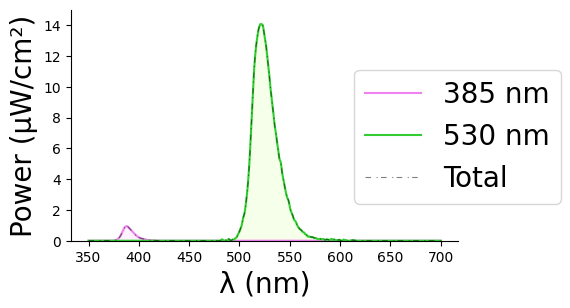

In [20]:
# First movie Violet frame
# ----------------------------------------
violet  = 0.0214 #53970030448
blue    = 0 
green   = 0
yellow  = 0.7829       #0.5 #175
red     = 0

First_Movie_Vframe_color_settings = [violet,blue,green,yellow,red]

First_Movie_Vframe_light = LEDs[0]*violet + LEDs[1]*blue + LEDs[2]*green + LEDs[3]*yellow + LEDs[4]*red

NDfilter = 0
Transmission =  10**(-NDfilter/10)

First_Movie_Vframe_light = (violet*LEDs[0]+blue*LEDs[1]+green*LEDs[2]+yellow*LEDs[3]+red*LEDs[4])*Transmission

First_Movie_ISO_result = IlluminanceFactor(First_Movie_Vframe_light,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(First_Movie_ISO_result,F=0)

# #Print voltages
# print('\n WRONG Voltages')
# print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
# print('yellowV',find_V(yellow,'r', newVcurves, Vnew),' V')
# print('greenV ',find_V(green,'r', newVcurves, Vnew),' V')
# print('blueV  ',find_V(blue,'r', newVcurves, Vnew),' V')
# print('violetV',find_V(violet,'r', newVcurves, Vnew),' V')

#Print voltages
print('\n Right Voltages')
print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
print('yellowV',find_V(yellow,'y', newVcurves, Vnew),' V')
print('greenV ',find_V(green,'g', newVcurves, Vnew),' V')
print('blueV  ',find_V(blue,'b', newVcurves, Vnew),' V')
print('violetV',find_V(violet,'v', newVcurves, Vnew),' V')

plot_spectrum(LEDs, x, First_Movie_Vframe_color_settings, ylim = [0,15])


#### Second Movie (Blue + Green + Yellow)
 
 Frame 1: 🟡 Yellow LED source   
 Frame 2: 🟢 + 🔵 Green and Blue LED sources

https://www.desmos.com/calculator/isrqi4t1jt?lang=it 

In [21]:
# Second movie Blue + Green frame
# ----------------------------------------

violet = 0
blue   = 0.00754236601511
green = 0.00203814039665
yellow = 0.7829
red    = 0

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :       1769
Melanopsin  :     982170
Rhodopsin   :    3581680
Mcones      :    1812866
Red_opsin   :    1753095

 Right Voltages
The index is: 0
redV    0.0  V
The index is: 3230
yellowV 3.23  V
The index is: 56
greenV  0.056  V
The index is: 49
blueV   0.049  V
The index is: 0
violetV 0.0  V


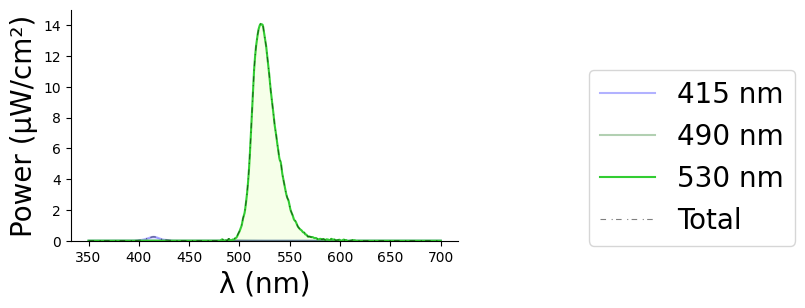

In [22]:
Second_Movie_Vframe_light = LEDs[0]*violet + LEDs[1]*blue + LEDs[2]*green + LEDs[3]*yellow + LEDs[4]*red

NDfilter = 0
Transmission =  10**(-NDfilter/10)

Second_Movie_Bframe_color_settings = [violet,blue,green,yellow,red]

Second_Movie_Vframe_light = (violet*LEDs[0]+blue*LEDs[1]+green*LEDs[2]+yellow*LEDs[3]+red*LEDs[4])*Transmission

Second_Movie_ISO_result = IlluminanceFactor(Second_Movie_Vframe_light,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(Second_Movie_ISO_result,F=0)

#Print voltages
print('\n Right Voltages')
print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
print('yellowV',find_V(yellow,'y', newVcurves, Vnew),' V')
print('greenV ',find_V(green,'g', newVcurves, Vnew),' V')
print('blueV  ',find_V(blue,'b', newVcurves, Vnew),' V')
print('violetV',find_V(violet,'v', newVcurves, Vnew),' V')

plot_spectrum(LEDs, x, Second_Movie_Bframe_color_settings, ylim = [0,15])

# Building (Mouse) colors for video stimulation 19 / 02 / 2023


## Computations

#### First Movie (Yellow + Violet)
 
 Frame 1: 🟡 Yellow LED source   
 Frame 2: 🟣 Violet LED source

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :      27652
Melanopsin  :     987102
Rhodopsin   :    3584115
Mcones      :    1813550
Red_opsin   :    1751896

 Right Voltages
The index is: 0
redV    0.0  V 

The index is: 3230
yellowV 3.23  V 

The index is: 0
greenV  0.0  V 

The index is: 0
blueV   0.0  V 

The index is: 160
violetV 0.16  V 



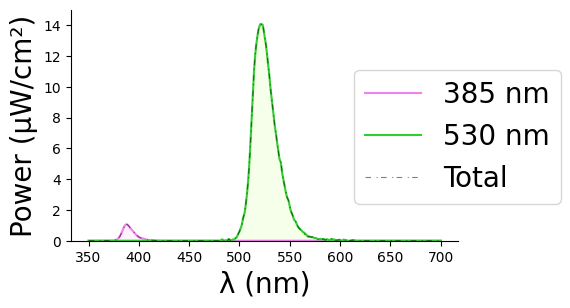

In [23]:
# First movie Violet frame
# ----------------------------------------


violet  = 0.0240
blue    = 0 
green   = 0
yellow  = 0.7829       #0.5 #175
red     = 0

First_Movie_Vframe_color_settings = [violet,blue,green,yellow,red]

First_Movie_Vframe_light = LEDs[0]*violet + LEDs[1]*blue + LEDs[2]*green + LEDs[3]*yellow + LEDs[4]*red

NDfilter = 0
Transmission =  10**(-NDfilter/10)

First_Movie_Vframe_light = (violet*LEDs[0]+blue*LEDs[1]+green*LEDs[2]+yellow*LEDs[3]+red*LEDs[4])*Transmission

First_Movie_ISO_result = IlluminanceFactor(First_Movie_Vframe_light,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(First_Movie_ISO_result,F=0)

# #Print voltages
# print('\n WRONG Voltages')
# print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
# print('yellowV',find_V(yellow,'r', newVcurves, Vnew),' V')
# print('greenV ',find_V(green,'r', newVcurves, Vnew),' V')
# print('blueV  ',find_V(blue,'r', newVcurves, Vnew),' V')
# print('violetV',find_V(violet,'r', newVcurves, Vnew),' V')

#Print voltages
print('\n Right Voltages')
print('redV   ',find_V(red,'r', newVcurves, Vnew),' V \n')
print('yellowV',find_V(yellow,'y', newVcurves, Vnew),' V \n')
print('greenV ',find_V(green,'g', newVcurves, Vnew),' V \n')
print('blueV  ',find_V(blue,'b', newVcurves, Vnew),' V \n')
print('violetV',find_V(violet,'v', newVcurves, Vnew),' V \n')

plot_spectrum(LEDs, x, First_Movie_Vframe_color_settings, ylim = [0,15])


#### Second Movie (Blue + Green + Yellow)
 
 Frame 1: 🟡 Yellow LED source   
 Frame 2: 🟢 + 🔵 Green and Blue LED sources

https://www.desmos.com/calculator/cugnir1utv?lang=it

In [24]:
# Second movie Blue + Green frame
# ----------------------------------------

# blue   = 0.0427165776183
# green = 0.0115431129007

violet = 0
blue   = 0.0085
green =  0.0023      
yellow = 0.783
red    = 0

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :       1994
Melanopsin  :     983566
Rhodopsin   :    3584726
Mcones      :    1813817
Red_opsin   :    1753978

 Right Voltages
The index is: 0
redV    0.0  V
The index is: 3230
yellowV 3.23  V
The index is: 57
greenV  0.057  V
The index is: 53
blueV   0.053  V
The index is: 0
violetV 0.0  V


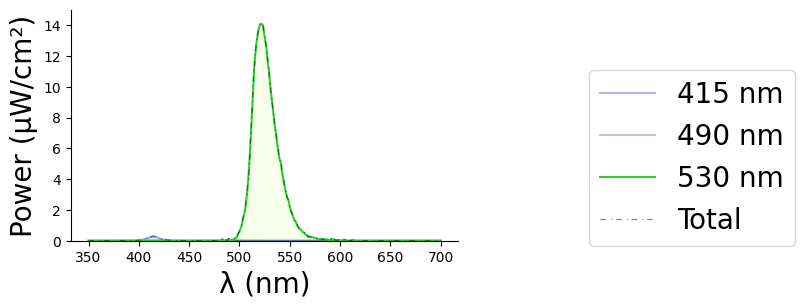

In [25]:
Second_Movie_Vframe_light = LEDs[0]*violet + LEDs[1]*blue + LEDs[2]*green + LEDs[3]*yellow + LEDs[4]*red

NDfilter = 0
Transmission =  10**(-NDfilter/10)

Second_Movie_Bframe_color_settings = [violet,blue,green,yellow,red]

Second_Movie_Vframe_light = (violet*LEDs[0]+blue*LEDs[1]+green*LEDs[2]+yellow*LEDs[3]+red*LEDs[4])*Transmission

Second_Movie_ISO_result = IlluminanceFactor(Second_Movie_Vframe_light,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(Second_Movie_ISO_result,F=0)

#Print voltages
print('\n Right Voltages')
print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
print('yellowV',find_V(yellow,'y', newVcurves, Vnew),' V')
print('greenV ',find_V(green,'g', newVcurves, Vnew),' V')
print('blueV  ',find_V(blue,'b', newVcurves, Vnew),' V')
print('violetV',find_V(violet,'v', newVcurves, Vnew),' V')

plot_spectrum(LEDs, x, Second_Movie_Bframe_color_settings, ylim = [0,15])

# Building (Mouse) colors for video stimulation 21 / 02 / 2024



## Computations


#### First Movie (Yellow + Violet)
 
 Frame 1: 🟡 Yellow LED source   
 Frame 2: 🟣 Violet LED source

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :      64403
Melanopsin  :    1006914
Rhodopsin   :    3614336
Mcones      :    1821942
Red_opsin   :    1757175

 Right Voltages
The index is: 0
redV    0.0  V
The index is: 3230
yellowV 3.23  V
The index is: 0
greenV  0.0  V
The index is: 0
blueV   0.0  V
The index is: 320
violetV 0.32  V


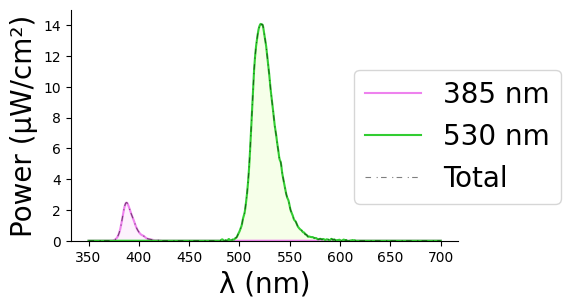

In [26]:

# First movie Violet frame
# ----------------------------------------


# .0540  (0.32 V)
# .0240  (0.16 V)

violet  = 0.0559 #53970030448
blue    = 0 
green   = 0
yellow  = 0.7829       #0.5 #175
red     = 0

First_Movie_Vframe_color_settings = [violet,blue,green,yellow,red]

First_Movie_Vframe_light = LEDs[0]*violet + LEDs[1]*blue + LEDs[2]*green + LEDs[3]*yellow + LEDs[4]*red

NDfilter = 0
Transmission =  10**(-NDfilter/10)

First_Movie_Vframe_light = (violet*LEDs[0]+blue*LEDs[1]+green*LEDs[2]+yellow*LEDs[3]+red*LEDs[4])*Transmission

First_Movie_ISO_result = IlluminanceFactor(First_Movie_Vframe_light,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(First_Movie_ISO_result,F=0)

# #Print voltages
# print('\n WRONG Voltages')
# print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
# print('yellowV',find_V(yellow,'r', newVcurves, Vnew),' V')
# print('greenV ',find_V(green,'r', newVcurves, Vnew),' V')
# print('blueV  ',find_V(blue,'r', newVcurves, Vnew),' V')
# print('violetV',find_V(violet,'r', newVcurves, Vnew),' V')

#Print voltages
print('\n Right Voltages')
print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
print('yellowV',find_V(yellow,'y', newVcurves, Vnew),' V')
print('greenV ',find_V(green,'g', newVcurves, Vnew),' V')
print('blueV  ',find_V(blue,'b', newVcurves, Vnew),' V')
print('violetV',find_V(violet,'v', newVcurves, Vnew),' V')

plot_spectrum(LEDs, x, First_Movie_Vframe_color_settings, ylim = [0,15])



#### Second Movie (Blue + Green + Yellow)
 
 Frame 1: 🟡 Yellow LED source   
 Frame 2: 🟢 + 🔵 Green and Blue LED sources
 


https://www.desmos.com/calculator/isrqi4t1jt?lang=it 

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :       4618
Melanopsin  :     998251
Rhodopsin   :    3614409
Mcones      :    1821942
Red_opsin   :    1761432

 Right Voltages
The index is: 0
redV    0.0  V
The index is: 3230
yellowV 3.23  V
The index is: 69
greenV  0.069  V
The index is: 107
blueV   0.107  V
The index is: 0
violetV 0.0  V


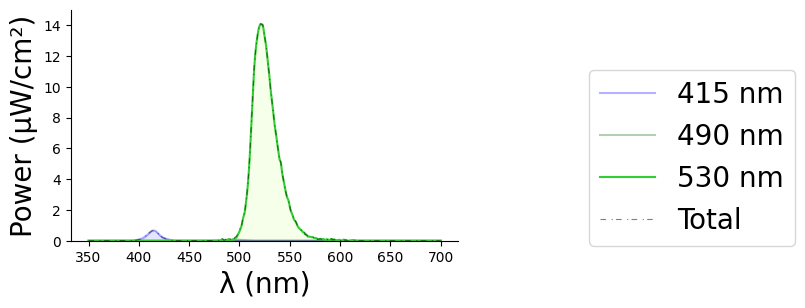

In [27]:

# Second movie Blue + Green frame
# ----------------------------------------

violet = 0
blue   = 0.0197017878619
green = 0.00532392748471
yellow = 0.7829
red    = 0
Second_Movie_Vframe_light = LEDs[0]*violet + LEDs[1]*blue + LEDs[2]*green + LEDs[3]*yellow + LEDs[4]*red

NDfilter = 0
Transmission =  10**(-NDfilter/10)

Second_Movie_Bframe_color_settings = [violet,blue,green,yellow,red]

Second_Movie_Vframe_light = (violet*LEDs[0]+blue*LEDs[1]+green*LEDs[2]+yellow*LEDs[3]+red*LEDs[4])*Transmission

Second_Movie_ISO_result = IlluminanceFactor(Second_Movie_Vframe_light,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(Second_Movie_ISO_result,F=0)

#Print voltages
print('\n Right Voltages')
print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
print('yellowV',find_V(yellow,'y', newVcurves, Vnew),' V')
print('greenV ',find_V(green,'g', newVcurves, Vnew),' V')
print('blueV  ',find_V(blue,'b', newVcurves, Vnew),' V')
print('violetV',find_V(violet,'v', newVcurves, Vnew),' V')

plot_spectrum(LEDs, x, Second_Movie_Bframe_color_settings, ylim = [0,15])

# Building (Mouse) colors for video stimulation FIGURES



## Computations


#### First Movie (Yellow + Violet)
 
 Frame 1: 🟡 Yellow LED source   
 Frame 2: 🟣 Violet LED source

In [28]:
from isomerization_lib import *

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :     288021
Melanopsin  :    1127465
Rhodopsin   :    3798220
Mcones      :    1872999
Red_opsin   :    1789299

 Right Voltages
The index is: 0
redV    0.0  V
The index is: 3230
yellowV 3.23  V
The index is: 0
greenV  0.0  V
The index is: 0
blueV   0.0  V
The index is: 1277
violetV 1.2770000000000001  V


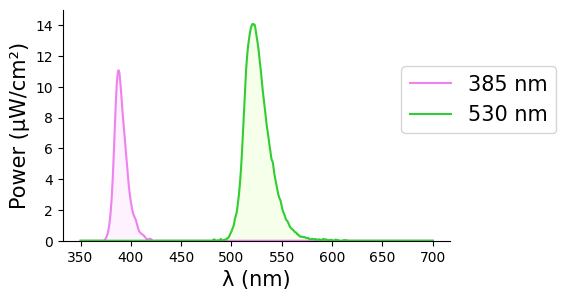

In [29]:

# First movie Violet frame
# ----------------------------------------


# .0540  (0.32 V)
# .0240  (0.16 V)

violet  = 0.25 #53970030448
blue    = 0 
green   = 0
yellow  = 0.7829       #0.5 #175
red     = 0

First_Movie_Vframe_color_settings = [violet,blue,green,yellow,red]

First_Movie_Vframe_light = LEDs[0]*violet + LEDs[1]*blue + LEDs[2]*green + LEDs[3]*yellow + LEDs[4]*red

NDfilter = 0
Transmission =  10**(-NDfilter/10)

First_Movie_Vframe_light = (violet*LEDs[0]+blue*LEDs[1]+green*LEDs[2]+yellow*LEDs[3]+red*LEDs[4])*Transmission

First_Movie_ISO_result = IlluminanceFactor(First_Movie_Vframe_light,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(First_Movie_ISO_result,F=0)

# #Print voltages
# print('\n WRONG Voltages')
# print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
# print('yellowV',find_V(yellow,'r', newVcurves, Vnew),' V')
# print('greenV ',find_V(green,'r', newVcurves, Vnew),' V')
# print('blueV  ',find_V(blue,'r', newVcurves, Vnew),' V')
# print('violetV',find_V(violet,'r', newVcurves, Vnew),' V')

#Print voltages
print('\n Right Voltages')
print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
print('yellowV',find_V(yellow,'y', newVcurves, Vnew),' V')
print('greenV ',find_V(green,'g', newVcurves, Vnew),' V')
print('blueV  ',find_V(blue,'b', newVcurves, Vnew),' V')
print('violetV',find_V(violet,'v', newVcurves, Vnew),' V')

plot_spectrum(LEDs, x, First_Movie_Vframe_color_settings, ylim = [0,15], plot_total = False, fontsize = 15)

#### Second Movie (Blue + Green + Yellow)
 
 Frame 1: 🟡 Yellow LED source   
 Frame 2: 🟢 + 🔵 Green and Blue LED sources
 


https://www.desmos.com/calculator/isrqi4t1jt?lang=it 

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :      23443
Melanopsin  :    1393820
Rhodopsin   :    4597357
Mcones      :    2155953
Red_opsin   :    2003857

 Right Voltages
The index is: 0
redV    0.0  V
The index is: 3230
yellowV 3.23  V
The index is: 775
greenV  0.775  V
The index is: 454
blueV   0.454  V
The index is: 0
violetV 0.0  V


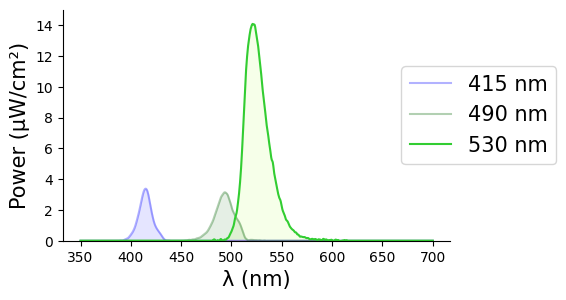

In [32]:

# Second movie Blue + Green frame
# ----------------------------------------

violet = 0
blue   = 0.1
green = 0.2
yellow = 0.7829
red    = 0
Second_Movie_Vframe_light = LEDs[0]*violet + LEDs[1]*blue + LEDs[2]*green + LEDs[3]*yellow + LEDs[4]*red

NDfilter = 0
Transmission =  10**(-NDfilter/10)

Second_Movie_Bframe_color_settings = [violet,blue,green,yellow,red]

Second_Movie_Vframe_light = (violet*LEDs[0]+blue*LEDs[1]+green*LEDs[2]+yellow*LEDs[3]+red*LEDs[4])*Transmission

Second_Movie_ISO_result = IlluminanceFactor(Second_Movie_Vframe_light,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(Second_Movie_ISO_result,F=0)

#Print voltages
print('\n Right Voltages')
print('redV   ',find_V(red,'r', newVcurves, Vnew),' V')
print('yellowV',find_V(yellow,'y', newVcurves, Vnew),' V')
print('greenV ',find_V(green,'g', newVcurves, Vnew),' V')
print('blueV  ',find_V(blue,'b', newVcurves, Vnew),' V')
print('violetV',find_V(violet,'v', newVcurves, Vnew),' V')

plot_spectrum(LEDs, x, Second_Movie_Bframe_color_settings, ylim = [0,15], plot_total=False, fontsize = 15)